# P5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower
import scienceplots

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [2]:
# Parámetros
H0 = 67.4  
omega_m = 0.315  
omega_ch2 = 0.120  
omega_bh2 = 0.0224  
ns = 0.965  
tau = 0.054  

# Resolver modelo
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau) 
pars.InitPower.set_params(As=2e-9, ns=ns, r=0)  
pars.set_for_lmax(2500, lens_potential_accuracy=0)
pars.set_matter_power(redshifts=[0], kmax=2.0)

# Obtener función de transferencia
results = camb.get_results(pars)
transfer_data = results.get_matter_transfer_data()
kh = transfer_data.transfer_data[0, :, 0]
k = kh * results.Params.h  #h/MPC
transfer_function = transfer_data.transfer_data[camb.model.Transfer_tot-1,:,0]

# Obtener matter power spectrum primordial
mps_primordial = results.Params.scalar_power(k)

# Juntando ambos resultados
mps = mps_primordial * transfer_function**2 * k**4 / (k**3/(2*np.pi**2))


C:\Users\Julian\AppData\Local\Temp\ipykernel_16948\623266838.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


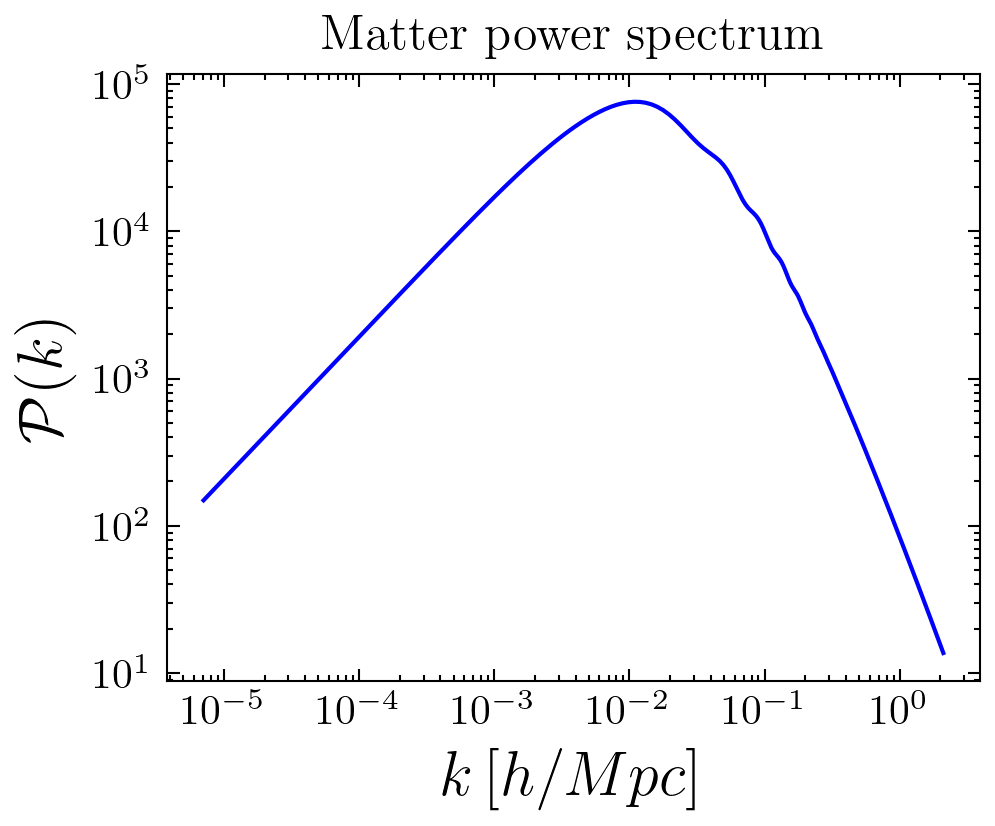

In [6]:
# Gráfico
kh2, zs, PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

plt.loglog(kh2, PK[0, :], c='b')
plt.title('Matter power spectrum')
plt.ylabel(r"$\mathcal{P}(k)$", fontsize=15)
plt.xlabel(r'$k\, [h/Mpc]$', fontsize=15)
plt.legend()

plt.show()